# Capstone: BNPL 


##### Medha Wagh


## Part 1 - EDA and Data Engineering

In [151]:
#### Importing Libraries ####

import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import time

from scipy.stats import shapiro,skew,kurtosis

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import RepeatedKFold,KFold,GridSearchCV,cross_validate,cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [125]:
# Importing the dataset
dataset = pd.read_csv('Mobileusebasedata.csv')

In [126]:
# How many entries(Rows) and attributes(Columns) are present in the data? What is the shape of the data?
# Write your Code here.
dataset.shape

(50000, 12)

In [127]:
# Display the first 5 entries of the dataset.
# Write your Code here.
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [128]:
# What are the different features available in the dataset?
# Write your Code here.
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [129]:
# Disply the distribution of Numerical Variables.
# Write your Code here.
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [131]:
# First set of Feature Cleaning
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int) # taking only the hours number from the given dataset

### Plotting Dataset
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [132]:
dataset2.shape[1]

7

<AxesSubplot:title={'center':'Correlation with Reposnse variable'}>

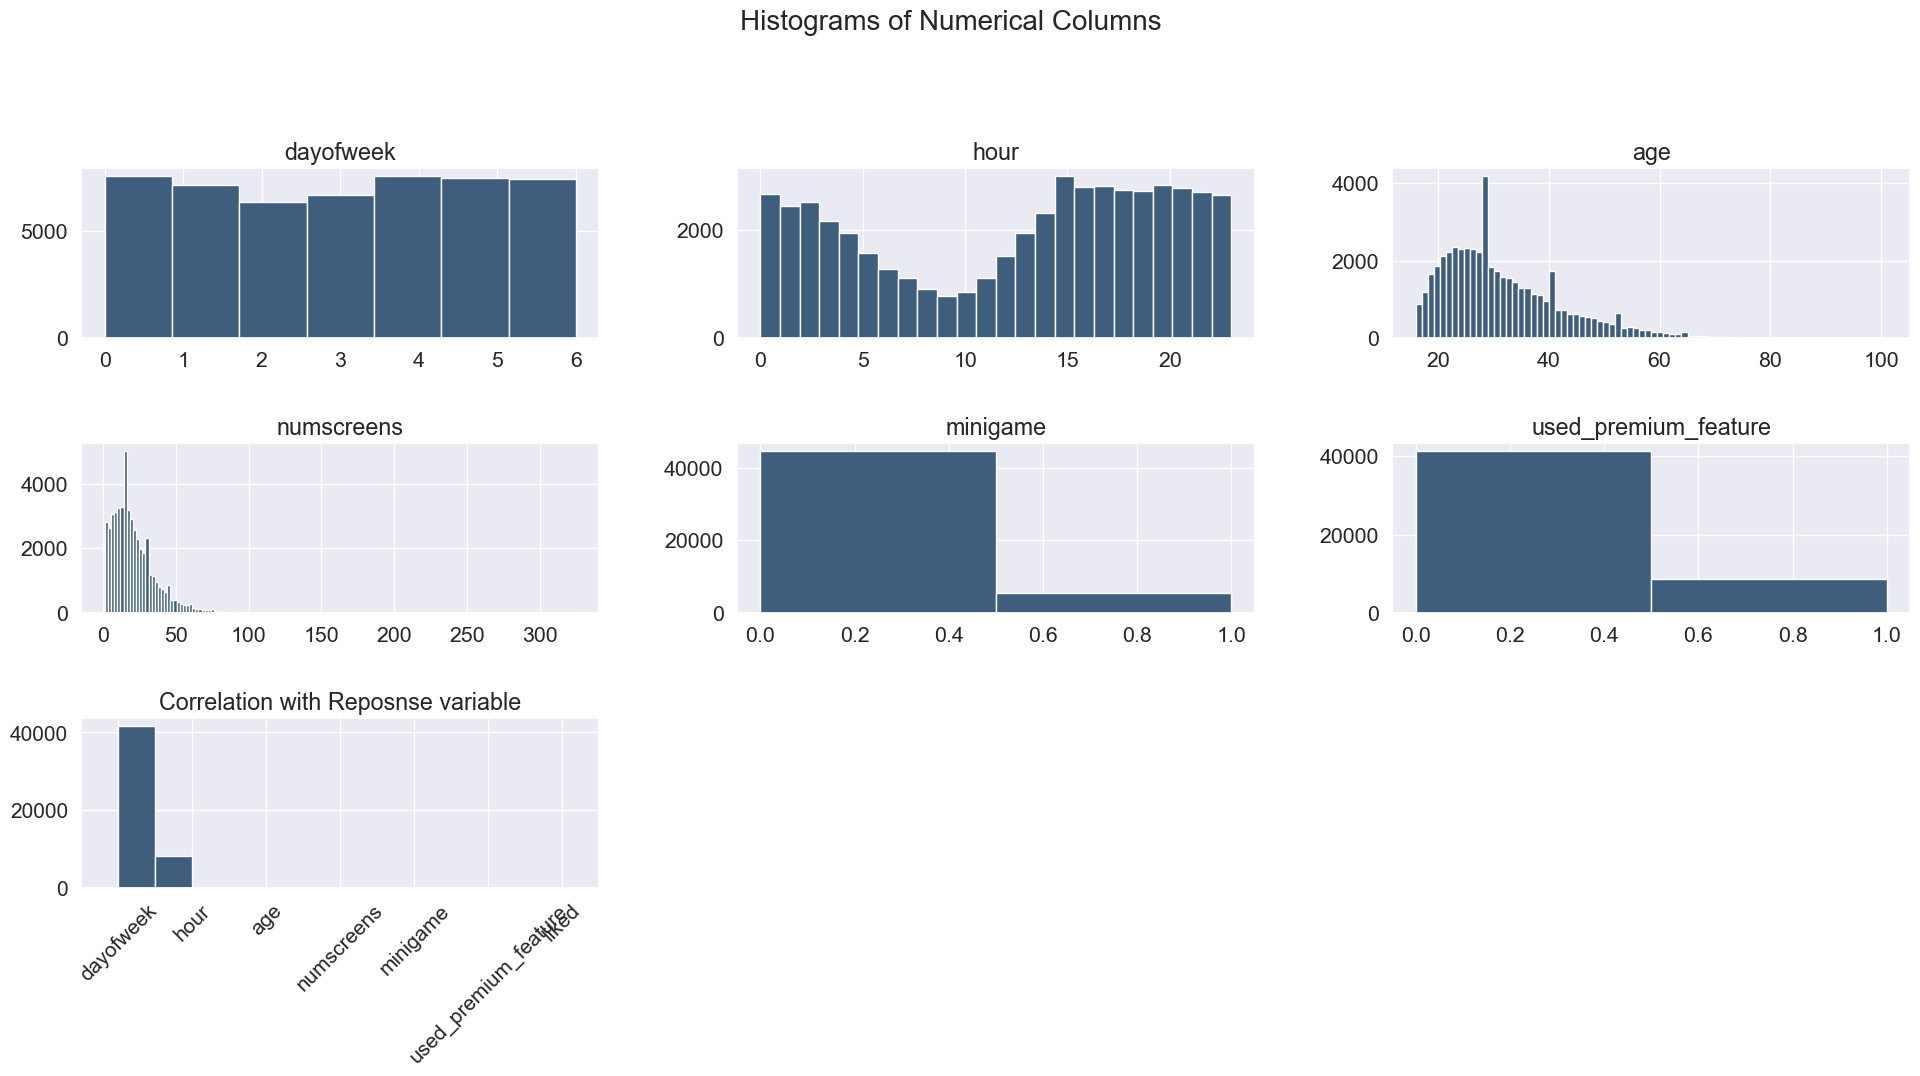

In [133]:
## Histograms - Part of Question 1

plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#plt.savefig('app_data_hist.jpg')

## Correlation with Response Variable
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)

<AxesSubplot:>

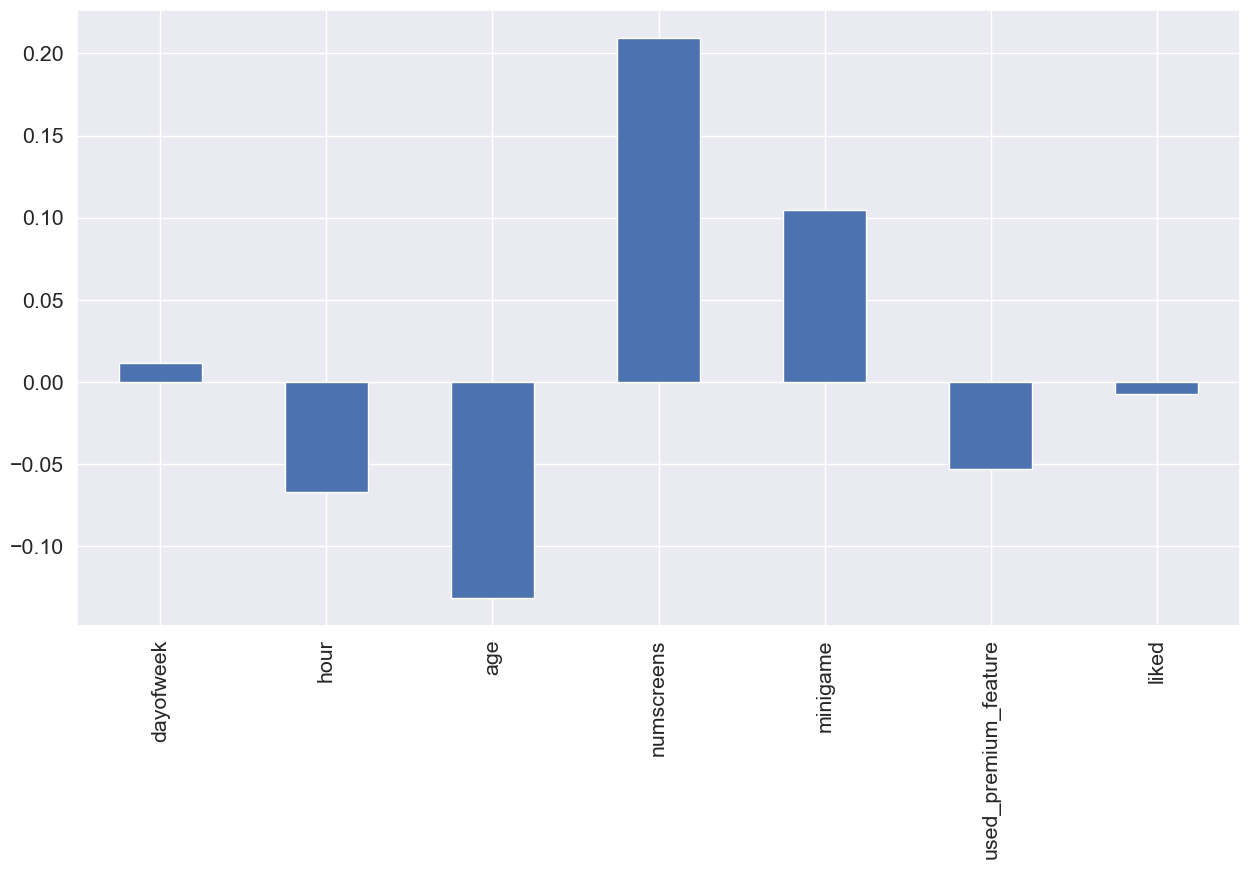

In [134]:
dataset2.corrwith(dataset.enrolled).plot.bar()

### Perform an EDA explanation for the Histograms in under 10 lines. What can you conclude from them? 

#### Write your Answer below. Add your explanations and justifications here.

•	Least number of users visited on Tuesday followed by Wednesday and the number of users were approximately same on rest.

•	The ages of the customers seem to be skewed to the left of the mean age. The 20-40 age group tend to visit app quite a lot of time as compared to 60-80 age group.

•	Similarly the numscreens is also skewed to the left showing that the number of screens visited tends to be less than the mean value of 21. This is the window in which conversions should be targeted.

•	Peoples are highly engaged during 3pm to 3am and less during 3am to 3pm.

•	Most of the people don't play mini games and haven't used premium features.

•	As the corrwith histogram is not very clear, we have plotted a bar graph showing the correlation between different features and the target variable. The 'numscreens' and 'age' features show a higher positive and negative correlation respectively.

##### Normal Distribution:
hours, dayofweek, minigame, premium features cannot be considered as a numerical data.
The other two follow a normal distribution but are skewed towards their right side.


In [135]:
## Correlation Matrix
sn.set(style="white", font_scale=2)

In [136]:
# Compute the Correlation Matrix
corr = dataset2.corr()

In [137]:
# Printing the Correlation Matrix
print(corr)

                      dayofweek      hour       age  numscreens  minigame  \
dayofweek              1.000000  0.013249 -0.012326    0.007925 -0.008631   
hour                   0.013249  1.000000  0.018859   -0.076756 -0.009120   
age                   -0.012326  0.018859  1.000000   -0.128739  0.019745   
numscreens             0.007925 -0.076756 -0.128739    1.000000  0.041154   
minigame              -0.008631 -0.009120  0.019745    0.041154  1.000000   
used_premium_feature   0.001439  0.022553  0.004301    0.061972  0.108780   
liked                 -0.005737 -0.001725 -0.002593   -0.007349 -0.012250   

                      used_premium_feature     liked  
dayofweek                         0.001439 -0.005737  
hour                              0.022553 -0.001725  
age                               0.004301 -0.002593  
numscreens                        0.061972 -0.007349  
minigame                          0.108780 -0.012250  
used_premium_feature              1.000000  0.001690 

<AxesSubplot:>

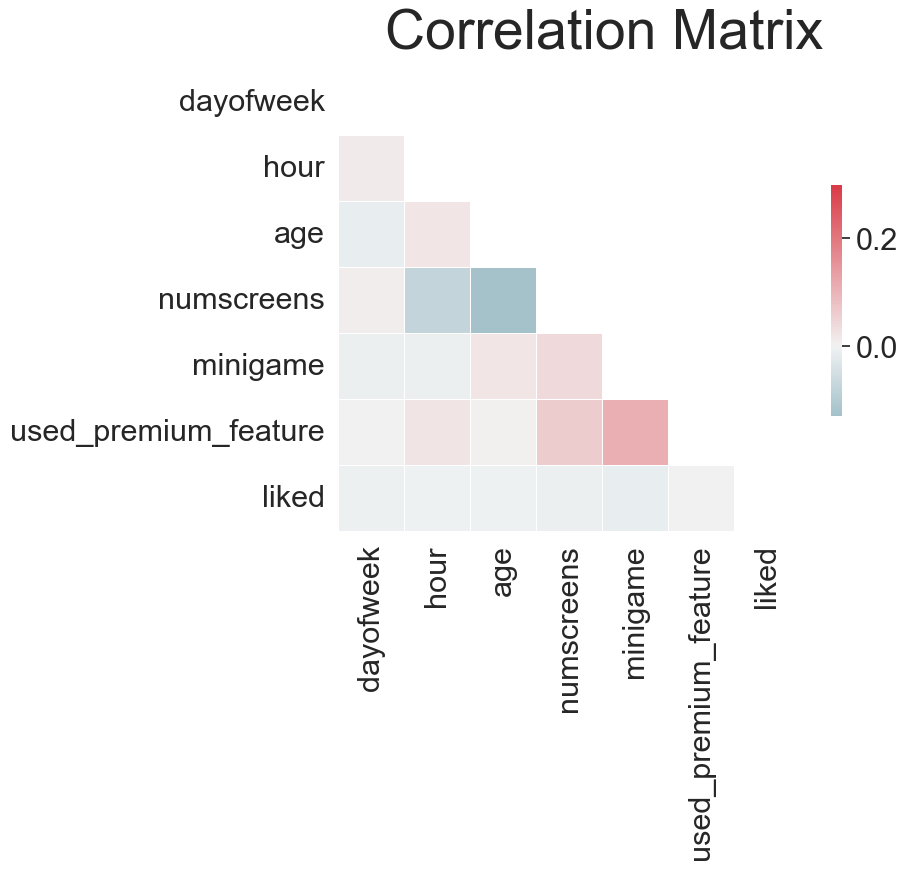

In [138]:
# Generate a mask for the upper triangle - Part of question 1
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Perform an EDA explanation for the Correlation Matrix in under 10 lines. What can you conclude from them? 

##### Write your Answer below. Add your explanations and justifications here.

The predictors are not highly correlated to each other which shows that there is no Multi collinearity between the predictors. When there is multi collinearity, It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison. Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of the model.


While the features don't really show a very high level of correlation amongst themselves, it seems like the features ['minigame','used_premium_feature'] shows a slightly higher positive correlation whereas the features ['numscreens','age'] show a negative correlation. 
This shows that younger people have a very short window of usage. Older people seem to spend a longer time exploring the app. 
Similarly, users who are already loyal as they have purchased a premium feature previously, tend to try out new features like minigames.



## Question 2 - Feature Selection, Encoding, Scaling, Outliers

In [139]:
# Formatting Date Columns
dataset.dtypes
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [140]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


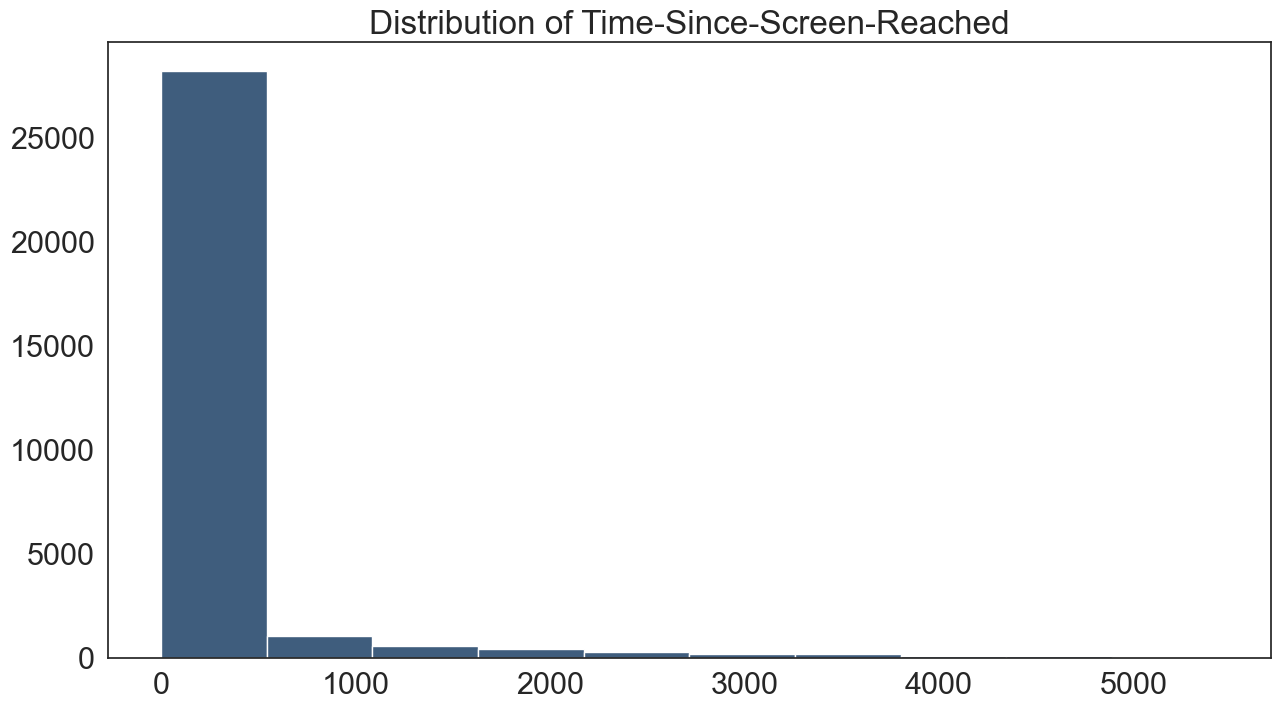

In [141]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

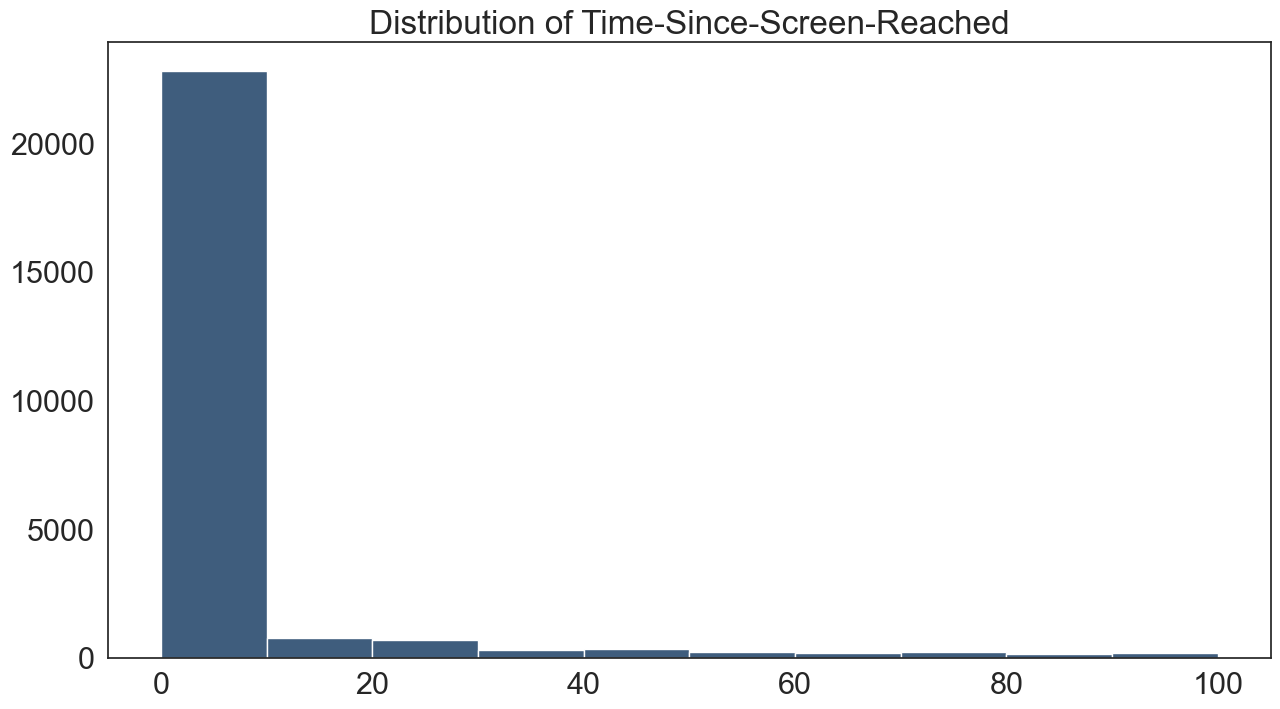

In [142]:

plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [143]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0 # Give two days or 48 Hrs. to enroll in BNPL feature else ignore User
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open']) # dropping the date columns

In [144]:
## Formatting the screen_list Field

# Load Top Screens 
top_screens = pd.read_csv('most_used_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [145]:
# Mapping Screens to Fields and dropping the screen_list feature
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [146]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [147]:
# Funnels - Funnel is a concept in app marketing that breaks down the user journey from noticing an app to becoming a loyal and valuable user.
# you can also think of it as a collection of screens used and opened by the user
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [148]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [149]:
#### Saving Results ####
dataset.head()
dataset.describe()
dataset.columns

dataset.to_csv('mobileusebasedata_engineered.csv', index = False)

In [150]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [152]:
# Importing the newly created dataset
dataset = pd.read_csv('mobileusebasedata_engineered.csv')

In [153]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [154]:
# Info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

In [155]:
# Checking the number of null values in the dataset
dataset.isnull().sum()

user                       0
dayofweek                  0
hour                       0
age                        0
numscreens                 0
minigame                   0
used_premium_feature       0
enrolled                   0
liked                      0
location                   0
Institutions               0
VerifyPhone                0
BankVerification           0
VerifyDateOfBirth          0
ProfilePage                0
VerifyCountry              0
Cycle                      0
idscreen                   0
Splash                     0
RewardsContainer           0
EditProfile                0
Finances                   0
Alerts                     0
Leaderboard                0
VerifyMobile               0
VerifyHousing              0
RewardDetail               0
VerifyHousingAmount        0
ProfileMaritalStatus       0
ProfileChildren            0
ProfileEducation           0
ProfileEducationMajor      0
Rewards                    0
AccountView                0
VerifyAnnualIn

In [156]:
# Count of each days in the descending order
dataset['dayofweek'].value_counts()

4    7531
0    7515
5    7423
6    7418
1    7139
3    6659
2    6315
Name: dayofweek, dtype: int64

##### Grouping hours and days to reduce the number of columns we would get after encoding

In [157]:
# Grouping hours into three categories
conditions = [
    (dataset['hour'] <= 8),
    (dataset['hour'] > 8) & (dataset['hour'] <= 16),
    (dataset['hour'] > 16)
    ]

values = [ 'H1', 'H2', 'H3']
     
dataset['hour_grouped'] = np.select(conditions, values)

In [158]:
# Count of each hour category in descending order
dataset['hour_grouped'].value_counts()

H3    19169
H1    16556
H2    14275
Name: hour_grouped, dtype: int64

In [159]:
# Grouping days into 3 categories
conditions = [
    (dataset['dayofweek'] == 1) | (dataset['dayofweek'] == 2) | (dataset['dayofweek'] == 3),
    (dataset['dayofweek'] == 4) | (dataset['dayofweek'] == 5),
    (dataset['dayofweek'] == 6) | (dataset['dayofweek'] == 0)
    ]

values = ['D1','D2','D3']
     
dataset['dayofweek_grouped'] = np.select(conditions, values)

In [160]:
# Dataset displaying new columns 
dataset[['hour','hour_grouped','dayofweek','dayofweek_grouped']]

,hour,hour_grouped,dayofweek,dayofweek_grouped
0,2,H1,3,D1
1,1,H1,6,D3
2,19,H3,1,D1
3,16,H2,4,D2
4,18,H3,1,D1
...,...,...,...,...
49995,13,H2,3,D1
49996,0,H1,1,D1
49997,22,H3,2,D1
49998,12,H2,6,D3


In [161]:
# Count of days category in descending order
dataset['dayofweek_grouped'].value_counts()

D1    20113
D2    14954
D3    14933
Name: dayofweek_grouped, dtype: int64

##### Why Encoding?
Most of the ML Algorithms prefer to work on numberical data. 
And as we have induced few new categorical values, we have to encode them and change it numerical values before applying an ML Algorithm.

In [162]:
# One Hot Encoding the newly created categorical variables
dataset = pd.get_dummies(dataset,columns=['hour_grouped','dayofweek_grouped'],drop_first=True)

dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount,hour_grouped_H2,hour_grouped_H3,dayofweek_grouped_D2,dayofweek_grouped_D3
0,235136,3,2,23,15,0,0,0,0,0,...,0,7,0,0,0,1,0,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,5,0,0,0,1,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,6,0,3,0,1,1,0,1,0
4,51549,1,18,31,32,0,0,1,1,0,...,0,10,0,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,6,0,2,0,0,1,0,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,6,0,0,0,0,0,1,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,13,0,0,0,0,1,0,0,1


In [163]:
# Splitting Independent and Response Variables
X = dataset.drop('enrolled',axis=1)
Y = dataset['enrolled']

#X.drop('user',axis=1,inplace=True)
X.drop('hour',axis=1,inplace=True)
X.drop('dayofweek',axis=1,inplace=True)

In [164]:
# Outliers % for all the Response Variables
IQR = dict()
colnames = X.columns
for i in colnames:
    IQR[i] = (np.percentile(X[i],80) - np.percentile(X[i],20))
    print('Outliers in',i,':',X[(X[i]>(np.percentile(X[i],80)+1.5*IQR[i])) | (X[i]<(np.percentile(X[i],20)-1.5*IQR[i]))].shape[0]*100/X.shape[0],'%')

Outliers in user : 0.0 %
Outliers in age : 0.806 %
Outliers in numscreens : 1.752 %
Outliers in minigame : 10.782 %
Outliers in used_premium_feature : 17.202 %
Outliers in liked : 16.5 %
Outliers in location : 0.0 %
Outliers in Institutions : 0.0 %
Outliers in VerifyPhone : 0.0 %
Outliers in BankVerification : 0.0 %
Outliers in VerifyDateOfBirth : 0.0 %
Outliers in ProfilePage : 15.804 %
Outliers in VerifyCountry : 0.0 %
Outliers in Cycle : 0.0 %
Outliers in idscreen : 0.0 %
Outliers in Splash : 0.0 %
Outliers in RewardsContainer : 8.4 %
Outliers in EditProfile : 4.898 %
Outliers in Finances : 7.654 %
Outliers in Alerts : 7.372 %
Outliers in Leaderboard : 5.152 %
Outliers in VerifyMobile : 5.386 %
Outliers in VerifyHousing : 4.508 %
Outliers in RewardDetail : 3.092 %
Outliers in VerifyHousingAmount : 4.142 %
Outliers in ProfileMaritalStatus : 4.756 %
Outliers in ProfileChildren  : 0.0 %
Outliers in ProfileEducation : 4.55 %
Outliers in ProfileEducationMajor : 4.106 %
Outliers in Reward

Not removing outliers as most of the data are in 0s and 1s, and the outliers are just the result of imbalancing

In [165]:
# Shapiro-Wills test for checking the Data Distribution of the Response Variables
for i in colnames:
    print(i,end=": ")
    if(shapiro(X[i])[0] > 0.05):
        print("Normal") 
    else: print("Not Normal")

user: Normal
age: Normal
numscreens: Normal
minigame: Normal
used_premium_feature: Normal
liked: Normal
location: Normal
Institutions: Normal
VerifyPhone: Normal
BankVerification: Normal
VerifyDateOfBirth: Normal
ProfilePage: Normal
VerifyCountry: Normal
Cycle: Normal
idscreen: Normal
Splash: Normal
RewardsContainer: Normal
EditProfile: Normal
Finances: Normal
Alerts: Normal
Leaderboard: Normal
VerifyMobile: Normal
VerifyHousing: Normal
RewardDetail: Normal
VerifyHousingAmount: Normal
ProfileMaritalStatus: Normal
ProfileChildren : Normal
ProfileEducation: Normal
ProfileEducationMajor: Normal
Rewards: Normal
AccountView: Normal
VerifyAnnualIncome: Normal
VerifyIncomeType: Normal
ProfileJobTitle: Normal
Login: Normal
ProfileEmploymentLength: Normal
WebView: Normal
SecurityModal: Normal
ResendToken: Normal
TransactionList: Normal
NetworkFailure: Normal
ListPicker: Normal
Other: Normal
SavingCount: Normal
CMCount: Normal
CCCount: Normal
LoansCount: Normal
hour_grouped_H2: Normal
hour_group

##### Why Scaling is done?
The response variables don't have a similar range. And they have a significant difference between them.
Many machine learning algorithms that are using Euclidean distance as a metric to calculate the similarities will fail to give a reasonable recognition to the smaller feature, which in the real case can turn out to be an actually important metrics.
Hence to remove that, Scaling is required. 

In [167]:
# Robust Scaler is used as we are not removing the outliers
scaler = RobustScaler()
X[X.drop(columns=['user']).columns] = scaler.fit_transform(X.drop(columns=['user']))
#X_std=pd.DataFrame(X_std,columns=colnames)

In [168]:
# Checking the Skew Values for each Response Variables.
for i in colnames:
    print(i,end=": ")
    print(skew(X[i]))

user: -0.0005720202744335817
age: 1.119900593211214
numscreens: 2.016796906735842
minigame: 2.5289458621741505
used_premium_feature: 1.7381128177946807
liked: 1.8050514815442849
location: -0.0710848569831194
Institutions: 0.9061166780420302
VerifyPhone: -0.09851931214055207
BankVerification: 0.7740108219047592
VerifyDateOfBirth: 0.10622952990634718
ProfilePage: 1.874891170538836
VerifyCountry: 0.3110551266362097
Cycle: 0.5614564185055472
idscreen: 0.672230428341953
Splash: 1.4940751506789605
RewardsContainer: 2.999410769056227
EditProfile: 4.179473546561454
Finances: 3.1855843977696416
Alerts: 3.2625798228942293
Leaderboard: 4.0576170810868515
VerifyMobile: 3.952667494896723
VerifyHousing: 4.385201740060762
RewardDetail: 5.419726291114205
VerifyHousingAmount: 4.602839978795477
ProfileMaritalStatus: 4.251588789349785
ProfileChildren : nan
ProfileEducation: 4.361844898049218
ProfileEducationMajor: 4.625734658585137
Rewards: 6.162391760793412
AccountView: 5.930071780669479
VerifyAnnualInc

In [169]:
# Appending a list of Response variables who don't have skew in the range -3 to +3
col=list()
for i in colnames:
    sk=skew(X[i])
    if(sk < 3) & (sk > -3):
        col.append(i)

In [170]:
# Creating a new response variable datafram without skewed columns
X_std_2 = X[col]
X_std_2

,user,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,...,Splash,RewardsContainer,WebView,Other,CMCount,LoansCount,hour_grouped_H2,hour_grouped_H3,dayofweek_grouped_D2,dayofweek_grouped_D3
0,235136,-0.461538,-0.166667,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
1,333588,-0.384615,-0.277778,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,1.0
2,254414,-0.461538,-0.833333,0.0,1.0,1.0,-1.0,0.0,-1.0,0.0,...,1.0,0.0,0.0,-1.2,0.0,0.0,0.0,1.0,0.0,0.0
3,234192,-0.076923,1.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0
4,51549,0.153846,0.777778,0.0,0.0,1.0,-1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.8,2.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,0.230769,-0.277778,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,-1.0,1.0,0.0,0.0,0.0
49996,169179,0.461538,-0.777778,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,...,1.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
49997,302367,0.769231,0.388889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0
49998,324905,-0.153846,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.4,0.0,-1.0,1.0,0.0,0.0,1.0


## Question 3

In [171]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_std_2, Y, test_size = 0.25 ,random_state = 4)

In [172]:
# Removing Identifiers, we remove user column as it is of no significance for our classification
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [173]:
X_test

,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,...,Splash,RewardsContainer,WebView,Other,CMCount,LoansCount,hour_grouped_H2,hour_grouped_H3,dayofweek_grouped_D2,dayofweek_grouped_D3
16477,-0.769231,0.277778,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,-0.2,1.0,0.0,1.0,0.0,0.0,1.0
5969,-0.461538,-0.333333,1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
46459,-0.615385,0.555556,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.6,3.0,0.0,0.0,0.0,0.0,0.0
33297,-0.846154,-0.166667,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.6,3.0,-1.0,1.0,0.0,0.0,1.0
35047,-0.615385,0.555556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.2,4.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,-0.307692,2.888889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
19420,0.923077,0.555556,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.4,3.0,0.0,0.0,0.0,0.0,0.0
20479,0.307692,-0.055556,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,1.0,0.0,1.0,-0.2,0.0,1.0,1.0,0.0,0.0,1.0
2173,-0.692308,-0.277778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


#### Classifier Model - Logistic Regression 

In [174]:
# Fitting Model to the Training Set
Log_classifier = LogisticRegression()
Log_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = Log_classifier.predict(X_test)

In [175]:
# Evaluating Results
# Printing the Confusion Matrix and Prescision Score of train and test of Logistic Regression
cm = confusion_matrix(y_test, y_pred)
cf = classification_report(y_test,y_pred)
print(cm)
print(cf)

print('Precision Score of Train Data:',precision_score(y_train,Log_classifier.predict(X_train)))
print('Precision Score of Train Data:',precision_score(y_test, y_pred))

[[4870 1497]
 [1506 4627]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6367
           1       0.76      0.75      0.75      6133

    accuracy                           0.76     12500
   macro avg       0.76      0.76      0.76     12500
weighted avg       0.76      0.76      0.76     12500

Precision Score of Train Data: 0.7580325054980421
Precision Score of Train Data: 0.7555519268451992


Test Data Accuracy: 0.7598


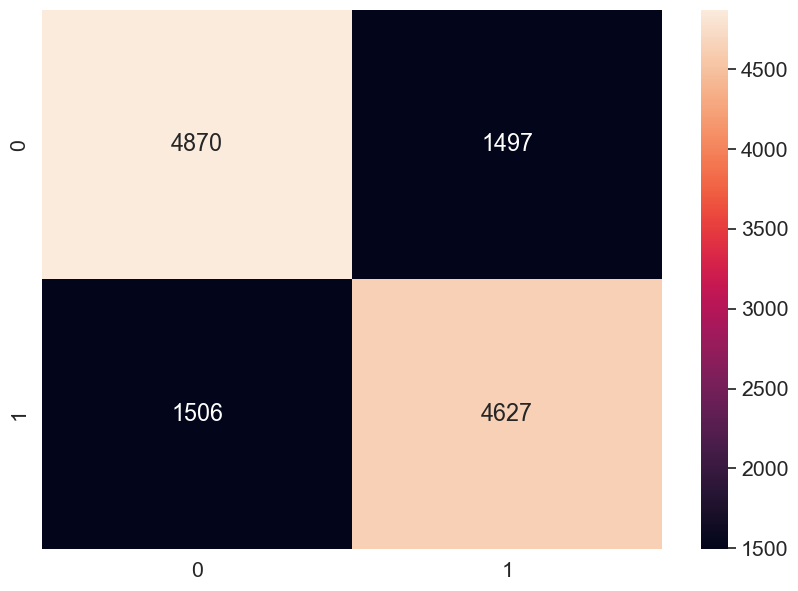

In [176]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [178]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,0
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1


#### Classification Model - Gradient Boosting

In [179]:
# Fitting Model to the Training Set
GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = GB_classifier.predict(X_test)

In [180]:
# Evaluating Results
# Printing the Confusion Matrix and Prescision Score of train and test of Gradient Boosting
cm = confusion_matrix(y_test, y_pred)
cf = classification_report(y_test,y_pred)
print(cm)
print(cf)

print('Precision Score of Train Data:',precision_score(y_train,GB_classifier.predict(X_train)))
print('Precision Score of Train Data:',precision_score(y_test, y_pred))

[[5200 1167]
 [1606 4527]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      6367
           1       0.80      0.74      0.77      6133

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500

Precision Score of Train Data: 0.7941972252604916
Precision Score of Train Data: 0.7950474183350895


Test Data Accuracy: 0.7782


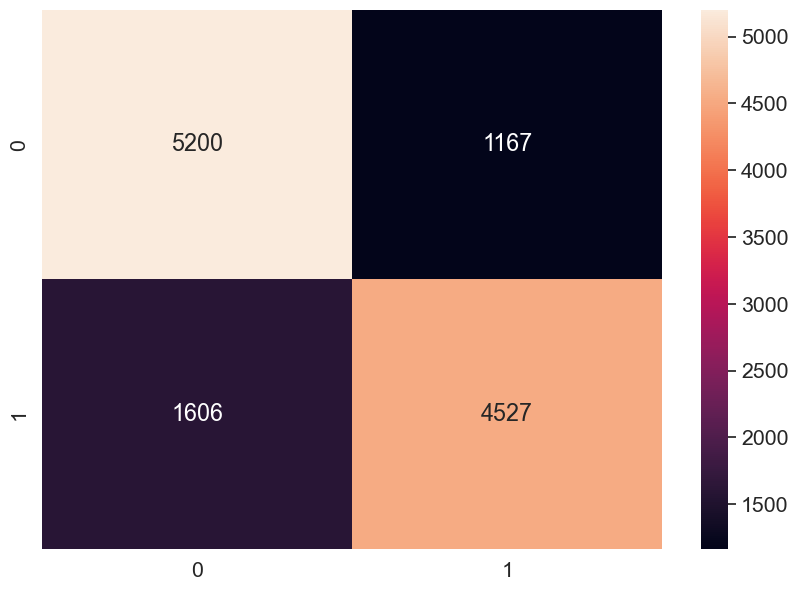

In [181]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [182]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,0
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1


#### Classifier Model - Ada Boosting

In [183]:
# Fitting Model to the Training Set
AB_classifier = AdaBoostClassifier()
AB_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = AB_classifier.predict(X_test)

In [184]:
# Evaluating Results
# Printing the Confusion Matrix and Prescision Score of train and test of Ada Boosting
cm = confusion_matrix(y_test, y_pred)
cf = classification_report(y_test,y_pred)
print(cm)
print(cf)

print('Precision Score of Train Data:',precision_score(y_train,AB_classifier.predict(X_train)))
print('Precision Score of Train Data:',precision_score(y_test, y_pred))

[[4918 1449]
 [1538 4595]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      6367
           1       0.76      0.75      0.75      6133

    accuracy                           0.76     12500
   macro avg       0.76      0.76      0.76     12500
weighted avg       0.76      0.76      0.76     12500

Precision Score of Train Data: 0.7612809315866085
Precision Score of Train Data: 0.7602581072137657


Test Data Accuracy: 0.7610


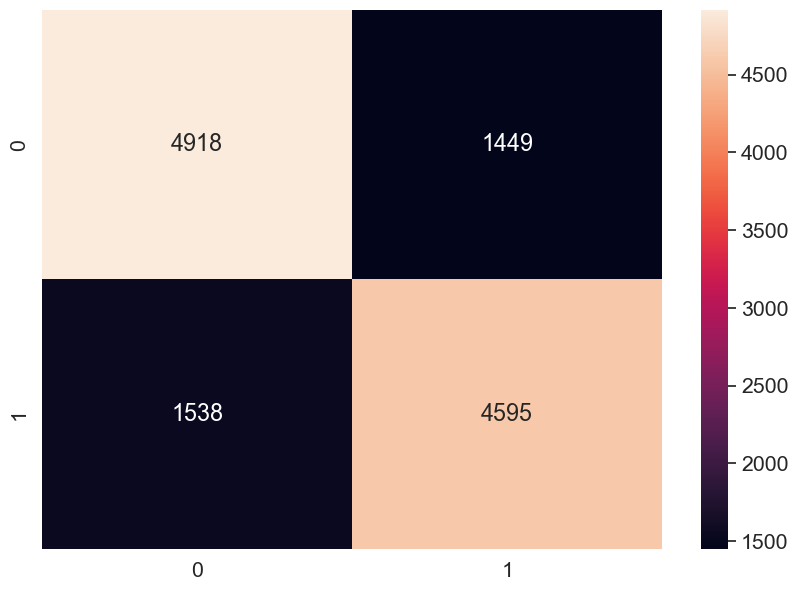

In [185]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [186]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,0
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1


In [187]:
# Applying k-Fold Cross Validation in Logistic Regression Classifier
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Log_classifier, X = X_std_2, y = Y, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.565 (+/- 0.191)


In [188]:
# Applying k-Fold Cross Validation in Gradient Boosting Classifier 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = GB_classifier, X = X_std_2, y = Y, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.773 (+/- 0.012)


In [189]:
# Applying k-Fold Cross Validation in Ada Boosting Classifier
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = AB_classifier, X = X_std_2, y = Y, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.758 (+/- 0.012)


## Question 4 - Applying Grid Search in the above Models

#### Logistic Regression with GSCV

In [190]:
# Checking the run time
t0 = time.time()

# Hyper parameters Grid
param_grid = {
    'penalty' : ['l1', 'l2','elasticnet'],
    'solver' : ['newton-cg','lbfgs','liblinear','saga'],
    'C' : [0.001, 0.01, 0.1, 0.2, 0.25, 0.4, 0.5, 1, 10, 100, 1000]
    
}

cv = RepeatedKFold(n_splits=4, n_repeats=2, random_state=1)
grid_search = GridSearchCV(Log_classifier,param_grid,cv=cv,scoring='precision',verbose=1)

grid_search = grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Fitting 8 folds for each of 132 candidates, totalling 1056 fits
0.7577397946194839
{'C': 0.25, 'penalty': 'l2', 'solver': 'newton-cg'}
Took 90.03 seconds


In [191]:
# Finding the best parameters of GridSearch
grid_search.best_params_

{'C': 0.25, 'penalty': 'l2', 'solver': 'newton-cg'}

In [192]:
# Including best hyper parameters and fitting the Model to the Training Set
Log_classifier = LogisticRegression(C=0.25, penalty = 'l2', solver ='newton-cg')
Log_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = Log_classifier.predict(X_test)

print('Precision Score of Train Data:',precision_score(y_train,Log_classifier.predict(X_train)))
print('Precision Score of Train Data:',precision_score(y_test, y_pred))

Precision Score of Train Data: 0.757965883488896
Precision Score of Train Data: 0.7556354132636394


In [193]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,0
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1


#### Gradient Boosting with GSCV

In [194]:
# Checking the run time
t0 = time.time()

# Hyper parameters Grid
param_grid = {
    "loss":["log_loss"],
    "learning_rate": [0.1],
    "min_samples_split": [500, 550],
    "min_samples_leaf": [60, 65],
    "max_depth":[13,14],
    "max_features":[14,15],
    "criterion": ["friedman_mse"],
    "subsample":[0.95],
    "n_estimators":[100,150]
    }
classifier = GradientBoostingClassifier() 

cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(classifier, param_grid, scoring ='precision', refit = True, cv = cv, verbose=1)

grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Fitting 6 folds for each of 32 candidates, totalling 192 fits
Took 1205.29 seconds


In [195]:
# Finding the best parameters of GridSearch
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 13,
 'max_features': 15,
 'min_samples_leaf': 65,
 'min_samples_split': 550,
 'n_estimators': 100,
 'subsample': 0.95}

In [198]:
# Including best hyper parameters and fitting the Model to the Training Set
GB_classifier = GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,loss='log_loss',
                                           max_depth=13,max_features=15,min_samples_leaf=65,min_samples_split=550,
                                           n_estimators=100,subsample=0.95)
GB_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = GB_classifier.predict(X_test)

print("Train Score:",precision_score(y_train, GB_classifier.predict(X_train)))
print("Test Score:",precision_score(y_test, y_pred))

Train Score: 0.8304633510819078
Test Score: 0.7932518505766913


In [199]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,0
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1


#### AdaBoosting with GSCV

In [200]:
# Checking the run time
t0 = time.time()

# Hyper parameters Grid
param_grid = {
    'algorithm' : ['SAMME', 'SAMME.R'],
    'learning_rate' : [0.1,0.2],
    'n_estimators' : [50,100,150],  
}

cv = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

grid_search = GridSearchCV(AB_classifier,param_grid,cv=cv,scoring='accuracy',verbose=1)

grid_search = grid_search.fit(X_train,y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Took 75.01 seconds


In [201]:
# Finding the best parameters of GridSearch
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 150}

In [202]:
# Including best hyper parameters and fitting the Model to the Training Set
AD_classifier = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.2,n_estimators=150)
AD_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = AD_classifier.predict(X_test)

print("Train Score:",accuracy_score(y_train,AD_classifier.predict(X_train)))
print("Test Score:",accuracy_score(y_test, y_pred))

Train Score: 0.7580266666666666
Test Score: 0.76064


In [203]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,0
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1


### PCA

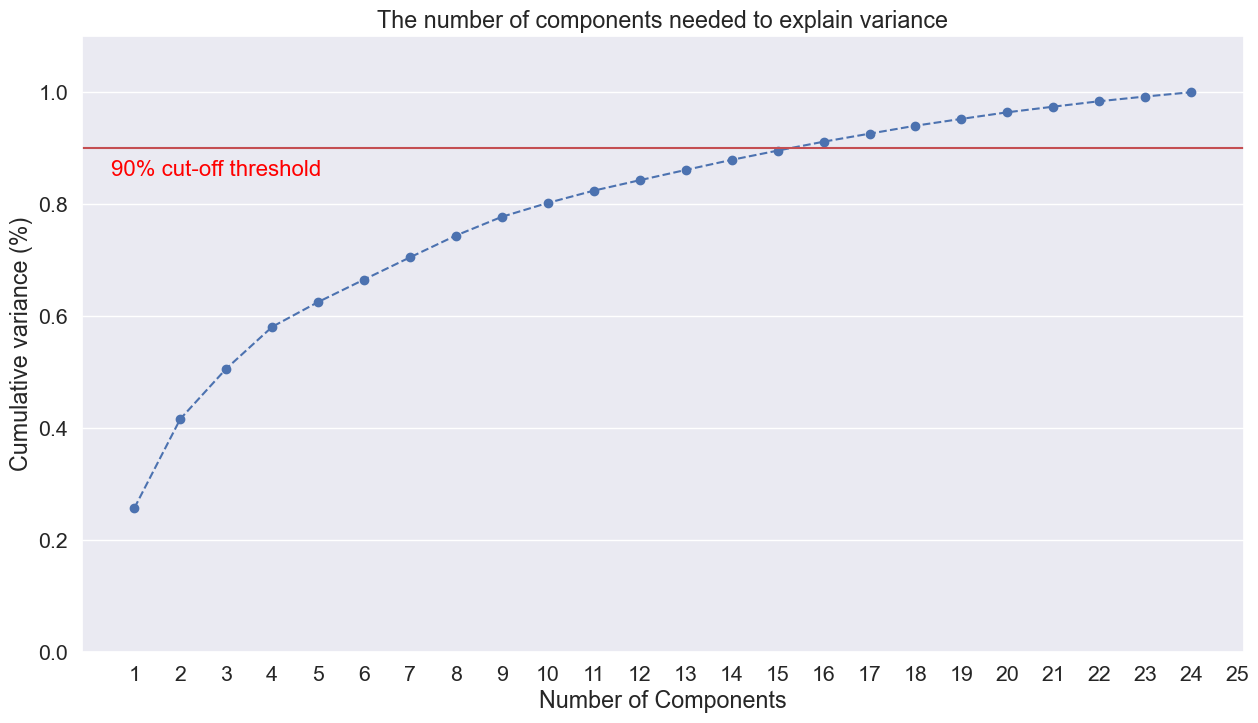

In [209]:
pca = PCA().fit(X_std_2.drop(columns=['user']))
plt.rcParams["figure.figsize"] = (15,8)
fig, ax = plt.subplots()
xi = np.arange(1, 25, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 26, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x') 
plt.show()

In [216]:
# Splitting User and other variables
X_std_user = X_std_2['user']
X_std_pc = X_std_2.drop('user', axis=1)
X_std_pc

,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,...,Splash,RewardsContainer,WebView,Other,CMCount,LoansCount,hour_grouped_H2,hour_grouped_H3,dayofweek_grouped_D2,dayofweek_grouped_D3
0,-0.461538,-0.166667,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.384615,-0.277778,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.461538,-0.833333,0.0,1.0,1.0,-1.0,0.0,-1.0,0.0,0.0,...,1.0,0.0,0.0,-1.2,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.076923,1.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0
4,0.153846,0.777778,0.0,0.0,1.0,-1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.8,2.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.230769,-0.277778,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,-1.0,1.0,0.0,0.0,0.0
49996,0.461538,-0.777778,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,...,1.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
49997,0.769231,0.388889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0
49998,-0.153846,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.4,0.0,-1.0,1.0,0.0,0.0,1.0


In [217]:
# Creating user into a new dataframe
X_std_user = X_std_2['user']
X_std_user=pd.DataFrame(X_std_user)
X_std_user

,user
0,235136
1,333588
2,254414
3,234192
4,51549
...,...
49995,222774
49996,169179
49997,302367
49998,324905


In [218]:
# Taking PCA components number to be 15 from the above graph
pca = PCA(n_components=15)
X_std_pc = pca.fit_transform(X_std_pc)

In [219]:
# Creating the PCA components into a new data frame
X_std_pc=pd.DataFrame(X_std_pc)
X_std_pc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.649705,0.686384,-0.765185,0.261778,0.109604,-0.120359,-0.175651,-0.571538,-0.690247,0.331896,-0.176549,-0.229190,-0.301932,0.053477,0.179833
1,-0.574896,0.765330,-0.472042,-0.083188,-0.010738,-0.124956,-0.910797,0.860719,-0.219693,-0.585009,0.244754,-0.554555,-0.265226,-0.516727,-0.500616
2,-1.720886,-0.718272,-0.904785,0.959600,-0.571359,0.066902,-0.034808,-0.405536,-0.139203,-0.658405,0.494394,0.323161,0.828509,0.804012,-0.022953
3,2.126960,-0.767018,-0.173236,-0.462474,0.597118,-0.752462,0.437616,0.808945,-0.320252,0.342057,-0.080902,0.279157,-0.156092,0.370828,-0.185733
4,1.506946,0.094094,0.014420,0.205732,-0.611726,0.325683,0.058372,-1.144397,0.672474,0.213308,0.067060,-1.136452,0.485815,-0.116115,0.112783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.233920,-1.068453,-0.246695,-0.592470,0.767264,-0.091876,0.060513,0.024956,0.594109,0.583972,0.923489,0.609029,0.036301,-0.061013,0.023463
49996,-1.829560,-0.763648,-0.214817,0.073380,0.325489,0.494148,0.375554,-0.540154,-0.018354,-0.667580,0.585294,0.746030,0.003521,0.413729,0.159844
49997,-0.649894,0.936865,0.519051,-1.051177,-0.628086,0.250099,0.207230,0.610549,-0.259493,-0.024777,0.227180,-0.026796,-0.209511,0.058523,-0.049476
49998,0.057687,2.013164,-0.191688,-0.759564,0.780233,0.370573,-0.571937,-0.193485,0.426727,-0.260921,0.211766,-0.108858,-0.346774,0.329399,0.416943


In [224]:
# Merging the newly created two data frames
X_std_pc_mergere = pd.concat([X_std_user,X_std_pc], axis=1)
X_std_pc_mergere

,user,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,235136,-0.649705,0.686384,-0.765185,0.261778,0.109604,-0.120359,-0.175651,-0.571538,-0.690247,0.331896,-0.176549,-0.229190,-0.301932,0.053477,0.179833
1,333588,-0.574896,0.765330,-0.472042,-0.083188,-0.010738,-0.124956,-0.910797,0.860719,-0.219693,-0.585009,0.244754,-0.554555,-0.265226,-0.516727,-0.500616
2,254414,-1.720886,-0.718272,-0.904785,0.959600,-0.571359,0.066902,-0.034808,-0.405536,-0.139203,-0.658405,0.494394,0.323161,0.828509,0.804012,-0.022953
3,234192,2.126960,-0.767018,-0.173236,-0.462474,0.597118,-0.752462,0.437616,0.808945,-0.320252,0.342057,-0.080902,0.279157,-0.156092,0.370828,-0.185733
4,51549,1.506946,0.094094,0.014420,0.205732,-0.611726,0.325683,0.058372,-1.144397,0.672474,0.213308,0.067060,-1.136452,0.485815,-0.116115,0.112783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,0.233920,-1.068453,-0.246695,-0.592470,0.767264,-0.091876,0.060513,0.024956,0.594109,0.583972,0.923489,0.609029,0.036301,-0.061013,0.023463
49996,169179,-1.829560,-0.763648,-0.214817,0.073380,0.325489,0.494148,0.375554,-0.540154,-0.018354,-0.667580,0.585294,0.746030,0.003521,0.413729,0.159844
49997,302367,-0.649894,0.936865,0.519051,-1.051177,-0.628086,0.250099,0.207230,0.610549,-0.259493,-0.024777,0.227180,-0.026796,-0.209511,0.058523,-0.049476
49998,324905,0.057687,2.013164,-0.191688,-0.759564,0.780233,0.370573,-0.571937,-0.193485,0.426727,-0.260921,0.211766,-0.108858,-0.346774,0.329399,0.416943


In [225]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_std_pc_mergere, Y, test_size = 0.25 ,random_state = 4)

In [226]:
# Removing Identifiers, we remove user column as it is of no significance for our classification
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
16477,-0.058896,-0.233121,-0.829383,0.495335,0.764309,0.140350,-0.620554,0.864721,-0.054654,0.242786,-0.147346,0.274725,-0.114391,0.081783,0.153619
5969,-1.056720,0.095355,-0.753052,0.919413,0.860899,-0.046747,-0.043003,-0.966748,-0.360786,0.259336,0.298041,0.609346,0.077171,-0.275548,0.418170
46459,2.423913,-0.165437,-0.747074,-0.454141,-0.043825,-0.354850,-0.333930,-0.201338,0.469283,-0.694161,0.135067,-0.355632,-0.422619,0.103794,0.428046
33297,1.385559,-0.823501,-1.245517,-0.828671,0.706189,0.085484,-0.659277,0.541491,0.741056,0.650104,0.376978,0.321447,-0.067617,-0.052462,0.482664
35047,2.898197,-1.386251,-1.101696,-0.394339,-0.676931,-0.099066,-0.209846,-0.600178,-0.679571,-0.251750,0.453541,0.244364,0.031110,-0.494397,0.135067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,2.065176,1.673473,0.256822,0.575409,-0.438756,1.242819,0.017836,0.566047,-0.561673,-0.273704,0.418569,-0.517913,-0.433020,0.090659,0.050822
19420,1.978065,-1.102619,0.661411,-0.715568,0.005496,-0.256138,-0.176459,0.566294,-0.170307,-0.180268,0.075123,-0.581336,0.715754,-0.138533,0.364807
20479,-0.758075,0.116740,0.233084,1.281201,0.750617,-0.133830,-1.033135,-0.634348,-1.095077,-0.035933,0.164484,0.485092,0.019964,-0.127859,-0.114275
2173,0.802097,-0.410943,-1.115310,-0.505392,-0.061521,-0.627271,-0.488568,0.184408,-0.525586,0.430015,-0.435798,-0.160365,0.871623,-0.013574,0.044574


#### Logistic Regression with GSCV and PCA

In [227]:
# Checking the run time
t0 = time.time()

# Hyper parameters Grid
param_grid = {
    'penalty' : ['l1', 'l2','elasticnet'],
    'solver' : ['newton-cg','lbfgs','liblinear','saga'],
    'C' : [0.001, 0.01, 0.1, 0.2, 0.25, 0.4, 0.5, 1, 10, 100, 1000]
    
}

cv = RepeatedKFold(n_splits=4, n_repeats=2, random_state=1)
grid_search = GridSearchCV(Log_classifier,param_grid,cv=cv,scoring='precision',verbose=1)

grid_search = grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Fitting 8 folds for each of 132 candidates, totalling 1056 fits
0.7436717554114307
{'C': 0.2, 'penalty': 'l2', 'solver': 'newton-cg'}
Took 67.89 seconds


In [228]:
# Finding the best parameters of GridSearch
grid_search.best_params_

{'C': 0.2, 'penalty': 'l2', 'solver': 'newton-cg'}

In [229]:
# Including best hyper parameters and fitting the Model to the Training Set
Log_classifier = LogisticRegression(C=0.2, penalty = 'l2', solver ='newton-cg')
Log_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = Log_classifier.predict(X_test)

print('Precision Score of Train Data:',precision_score(y_train,Log_classifier.predict(X_train)))
print('Precision Score of Train Data:',precision_score(y_test, y_pred))

Precision Score of Train Data: 0.7440763318314338
Precision Score of Train Data: 0.7410815173527038


In [230]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,0
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1


#### Gradient Boosting with GSCV and PCA

In [231]:
# Checking the run time
t0 = time.time()

# Hyper parameters Grid
param_grid = {
    "loss":["log_loss"],
    "learning_rate": [0.1],
    "min_samples_split": [500, 550],
    "min_samples_leaf": [60, 65],
    "max_depth":[13,14],
    "max_features":[14,15],
    "criterion": ["friedman_mse"],
    "subsample":[0.95],
    "n_estimators":[100,150]
    }
classifier = GradientBoostingClassifier() 

cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=1)
grid_search = GridSearchCV(classifier, param_grid, scoring ='precision', refit = True, cv = cv, verbose=1)

grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Fitting 6 folds for each of 32 candidates, totalling 192 fits
Took 10153.81 seconds


In [232]:
# Finding the best parameters of GridSearch
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 13,
 'max_features': 15,
 'min_samples_leaf': 65,
 'min_samples_split': 550,
 'n_estimators': 100,
 'subsample': 0.95}

In [242]:
# Including best hyper parameters and fitting the Model to the Training Set
GB_classifier = GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,loss='log_loss',
                                           max_depth=13,max_features=15,min_samples_leaf=65,min_samples_split=550,
                                           n_estimators=100,subsample=0.95)
GB_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = GB_classifier.predict(X_test)

print("Train Score:",precision_score(y_train, GB_classifier.predict(X_train)))
print("Test Score:",precision_score(y_test, y_pred))

Train Score: 0.8396278966131907
Test Score: 0.7731923601637107


In [241]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,1
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1


#### AdaBoosting with GSCV and PCA

In [235]:
# Checking the run time
t0 = time.time()

# Hyper parameters Grid
param_grid = {
    'algorithm' : ['SAMME', 'SAMME.R'],
    'learning_rate' : [0.1,0.2],
    'n_estimators' : [50,100,150],  
}

cv = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

grid_search = GridSearchCV(AB_classifier,param_grid,cv=cv,scoring='accuracy',verbose=1)

grid_search = grid_search.fit(X_train,y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Took 227.25 seconds


In [236]:
# Finding the best parameters of GridSearch
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 150}

In [237]:
# Including best hyper parameters and fitting the Model to the Training Set
AD_classifier = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.2,n_estimators=150)
AD_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = AD_classifier.predict(X_test)

print("Train Score:",accuracy_score(y_train,AD_classifier.predict(X_train)))
print("Test Score:",accuracy_score(y_test, y_pred))

Train Score: 0.7549333333333333
Test Score: 0.75208


In [238]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,0
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1


## Conclusion



On comparing the precision scrores of the above build models, we find that the precision scores for the Gradient Boosting model with GSCV and without PCA gives us best precision percentage for the Test data. Hence we are choosing that model as the best model.


In [243]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_std_2, Y, test_size = 0.25 ,random_state = 4)

In [244]:
# Removing Identifiers, we remove user column as it is of no significance for our classification
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [245]:
X_test

,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,...,Splash,RewardsContainer,WebView,Other,CMCount,LoansCount,hour_grouped_H2,hour_grouped_H3,dayofweek_grouped_D2,dayofweek_grouped_D3
16477,-0.769231,0.277778,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,-0.2,1.0,0.0,1.0,0.0,0.0,1.0
5969,-0.461538,-0.333333,1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
46459,-0.615385,0.555556,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.6,3.0,0.0,0.0,0.0,0.0,0.0
33297,-0.846154,-0.166667,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.6,3.0,-1.0,1.0,0.0,0.0,1.0
35047,-0.615385,0.555556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.2,4.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,-0.307692,2.888889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
19420,0.923077,0.555556,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.4,3.0,0.0,0.0,0.0,0.0,0.0
20479,0.307692,-0.055556,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,1.0,0.0,1.0,-0.2,0.0,1.0,1.0,0.0,0.0,1.0
2173,-0.692308,-0.277778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [246]:
# Including best hyper parameters for Gradient Boosting and fitting the Model to the Training Set
GB_classifier = GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,loss='log_loss',
                                           max_depth=13,max_features=15,min_samples_leaf=65,min_samples_split=550,
                                           n_estimators=100,subsample=0.95)
GB_classifier.fit(X_train,y_train)

# Predicting Test Set
y_pred = GB_classifier.predict(X_test)

print("Train Score:",precision_score(y_train, GB_classifier.predict(X_train)))
print("Test Score:",precision_score(y_test, y_pred))

Train Score: 0.8300882952230021
Test Score: 0.7932220884225013


In [247]:
# Evaluating Results
# Printing the Confusion Matrix and Prescision Score of train and test of Gradient Boosting with best hyper parameters
cm = confusion_matrix(y_test, y_pred)
cf = classification_report(y_test,y_pred)
print(cm)
print(cf)

print('Precision Score of Train Data:',precision_score(y_train,GB_classifier.predict(X_train)))
print('Precision Score of Train Data:',precision_score(y_test, y_pred))

[[5165 1202]
 [1522 4611]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      6367
           1       0.79      0.75      0.77      6133

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500

Precision Score of Train Data: 0.8300882952230021
Precision Score of Train Data: 0.7932220884225013


Test Data Accuracy: 0.7821


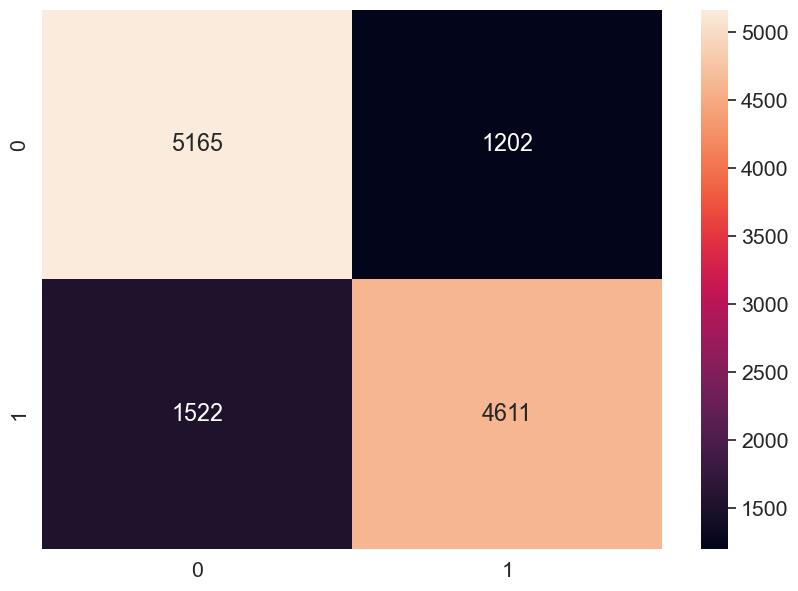

In [248]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

From the above model, we have to concentrate on the users who have the predicted_reach = 1 as they are they have the best chances to enroll into the BNPL scheme.

Below is the table which contains the users to target.

In [250]:
#### End of Model ####
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,7017,0,0
1,246045,1,1
2,295804,1,1
3,369646,1,1
4,138001,1,1
...,...,...,...
12495,233981,1,1
12496,34573,1,1
12497,102108,0,0
12498,110257,1,1
